#Chess Opening Classifier

##Objective:
 Train classification models to predict the chess opening based on the first few moves.

##Models :    
####1. Random Forest
####2. SVM
####3. XGBoost
####4. KNN
####5. Logistic Regression
####6. Neural Network

###Dataset Modification:

In [334]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Personal_ML_Project/Chess-Opening-Classfier/openings.csv")
df.head(2)

,Unnamed: 0,Opening,Colour,Num Games,ECO,Last Played,Perf Rating,Avg Player,Player Win %,Draw %,...,move2b,move3w,move3b,move4w,move4b,White_win%,Black_win%,White_odds,White_Wins,Black_Wins
0,0,"Alekhine Defense, Balogh Variation",white,692,B03,2018-06-22,2247,2225,40.8,24.3,...,Nd5,d4,d6,Bc4,NaN,40.8,35.0,1.165714,282.336,242.200
1,1,"Alekhine Defense, Brooklyn Variation",black,228,B02,2018-06-27,2145,2193,29.8,22.4,...,Ng8,NaN,NaN,NaN,NaN,47.8,29.8,1.604027,108.984,67.944


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1884 non-null   int64  
 1   Opening         1884 non-null   object 
 2   Colour          1884 non-null   object 
 3   Num Games       1884 non-null   int64  
 4   ECO             1884 non-null   object 
 5   Last Played     1884 non-null   object 
 6   Perf Rating     1884 non-null   int64  
 7   Avg Player      1884 non-null   int64  
 8   Player Win %    1884 non-null   float64
 9   Draw %          1884 non-null   float64
 10  Opponent Win %  1884 non-null   float64
 11  Moves           1884 non-null   object 
 12  moves_list      1884 non-null   object 
 13  move1w          1884 non-null   object 
 14  move1b          1869 non-null   object 
 15  move2w          1814 non-null   object 
 16  move2b          1744 non-null   object 
 17  move3w          1628 non-null   o

In [336]:
# Keep only relevant columns for project
df = df[["move1w", "move1b", "move2w", "move2b", "move3w", "move3b", "move4w", "move4b", "Colour", "Opening"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   move1w   1884 non-null   object
 1   move1b   1869 non-null   object
 2   move2w   1814 non-null   object
 3   move2b   1744 non-null   object
 4   move3w   1628 non-null   object
 5   move3b   1501 non-null   object
 6   move4w   1340 non-null   object
 7   move4b   1186 non-null   object
 8   Colour   1884 non-null   object
 9   Opening  1884 non-null   object
dtypes: object(10)
memory usage: 147.3+ KB


In [337]:
df.isnull().sum()

,0
move1w,0
move1b,15
move2w,70
move2b,140
move3w,256
move3b,383
move4w,544
move4b,698
Colour,0
Opening,0


In [338]:
df = df.dropna(subset=["move3w", "move3b", "move4w", "move4b"])

df.isnull().sum()


,0
move1w,0
move1b,0
move2w,0
move2b,0
move3w,0
move3b,0
move4w,0
move4b,0
Colour,0
Opening,0


###Find the Top 10 Openings

In [339]:
top_openings = df["Opening"].value_counts().index[:10]  # Get the top 10 opening names
print(top_openings)
df = df[df["Opening"].isin(top_openings)]


Index(['Spanish Game, Morphy Defense, Modern Steinitz Defense',
       'Sicilian Defense, Najdorf Variation',
       'French Defense, Winawer Variation, Advance Variation',
       'Nimzo-Indian Defense, Saemisch Variation',
       'Sicilian Defense, Dragon Variation, Yugoslav Attack',
       'Sicilian Defense, Dragon Variation, Classical Variation',
       'Four Knights Game, Spanish Variation, Symmetrical Variation',
       'Neo-Gruenfeld Defense, Delayed Exchange Variation',
       'Gruenfeld Defense, Exchange Variation, Spassky Variation',
       'Benoni Defense, Classical Variation, Czerniak Defense'],
      dtype='object', name='Opening')


###Covernt Dataset To Numerical Values

In [340]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
columns_to_encode = ["Opening","move1w", "move1b", "move2w", "move2b", "move3w", "move3b", "move4w", "move4b", "Colour"]

for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 51 to 1766
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   move1w   46 non-null     int64
 1   move1b   46 non-null     int64
 2   move2w   46 non-null     int64
 3   move2b   46 non-null     int64
 4   move3w   46 non-null     int64
 5   move3b   46 non-null     int64
 6   move4w   46 non-null     int64
 7   move4b   46 non-null     int64
 8   Colour   46 non-null     int64
 9   Opening  46 non-null     int64
dtypes: int64(10)
memory usage: 4.0 KB


###Random Forest Classifier

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = df.drop(columns=["Opening"])  # Features: Encoded chess moves + Colour
y = df["Opening"]  # Target: Encoded chess opening

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10,random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.7


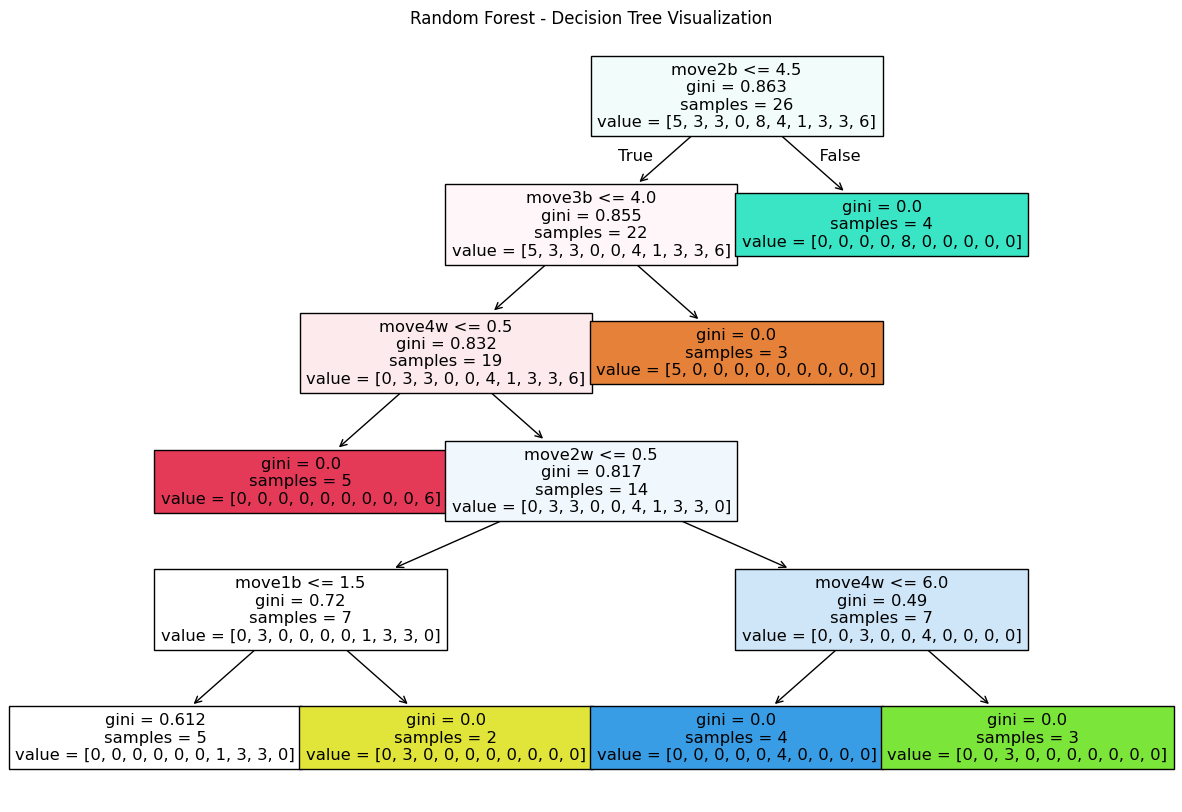

In [342]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select one tree from the forest
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns)
plt.title("Random Forest - Decision Tree Visualization")
plt.show()


###Support Vector Machine (SVM)

In [343]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")


SVM Accuracy: 0.7


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


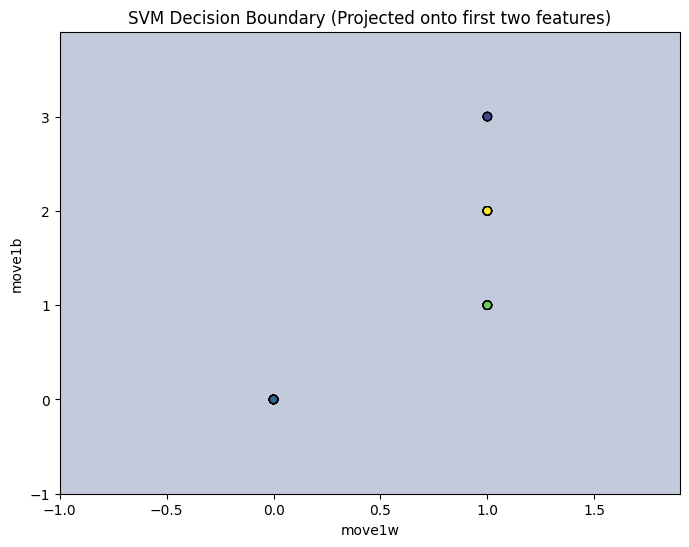

In [344]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid for visualization based on the first two features
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Get the mean of the other features from the training data
other_features_mean = X_train.iloc[:, 2:].mean().values

# Create the grid for prediction, adding the mean of other features
# Each point in the grid will have the first two features from the meshgrid
# and the mean values for the remaining features
grid_points = np.c_[xx.ravel(), yy.ravel()]
# Repeat the mean of other features for each point in the grid
repeated_other_features = np.tile(other_features_mean, (grid_points.shape[0], 1))
# Combine the first two features with the repeated mean of other features
grid_for_prediction = np.hstack((grid_points, repeated_other_features))

# Predict on the grid using the model trained on all features
Z = svm_model.predict(grid_for_prediction)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
# Plot the training points using only the first two features
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors="k")
plt.title("SVM Decision Boundary (Projected onto first two features)")
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.show()

###XGBoost

In [345]:
from sklearn.ensemble import GradientBoostingClassifier

xgb_model = GradientBoostingClassifier(n_estimators=200)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")


XGBoost Accuracy: 0.7


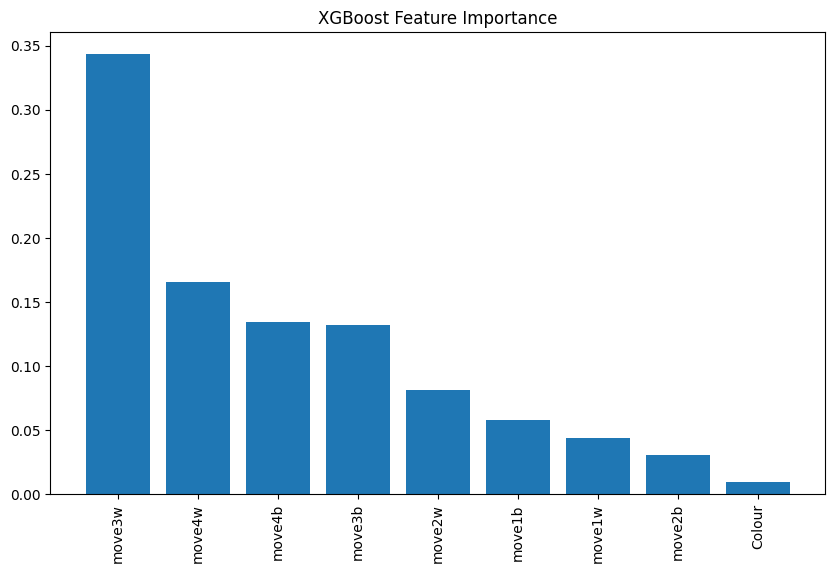

In [346]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importance = xgb_model.feature_importances_
indices = np.argsort(importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("XGBoost Feature Importance")
plt.show()


###K-Nearest Neighbors (KNN)

In [347]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")


KNN Accuracy: 0.7


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


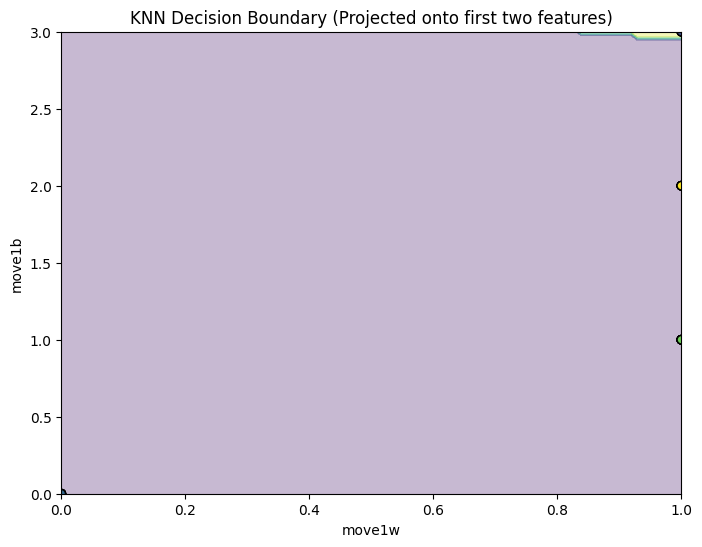

In [348]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Mesh grid based on the first two features
xx, yy = np.meshgrid(np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 100),
                     np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 100))

# Get the mean of the other features from the training data
other_features_mean = X_train.iloc[:, 2:].mean().values

# Create the grid for prediction by adding the mean of other features
# Each point in the grid will have the first two features from the meshgrid
# and the mean values for the remaining features
grid_points = np.c_[xx.ravel(), yy.ravel()]
# Repeat the mean of other features for each point in the grid
repeated_other_features = np.tile(other_features_mean, (grid_points.shape[0], 1))
# Combine the first two features with the repeated mean of other features
grid_for_prediction = np.hstack((grid_points, repeated_other_features))


# Predict on the grid using the model trained on all features
# Ensure that the grid has the correct number of features (9 in this case)
Z = knn_model.predict(grid_for_prediction)
Z = Z.reshape(xx.shape)

# Plot boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors="k")
plt.title("KNN Decision Boundary (Projected onto first two features)")
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.show()

###Logistic Regression

In [349]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy}")


Logistic Regression Accuracy: 0.7


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


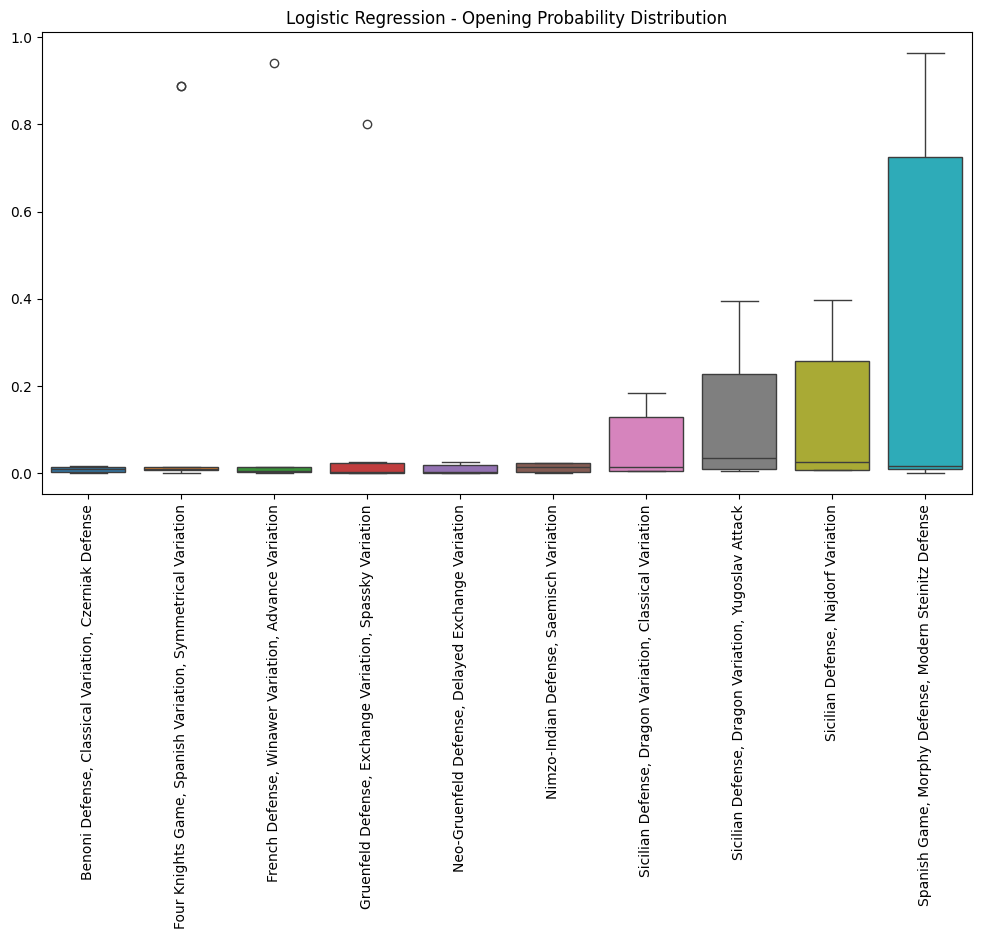

In [350]:
import seaborn as sns
import pandas as pd

# Get probabilities for test set
probabilities = lr_model.predict_proba(X_test)

# Convert to DataFrame
prob_df = pd.DataFrame(probabilities, columns=opening_encoder.classes_)

# Plot probability distributions
plt.figure(figsize=(12,6))
sns.boxplot(data=prob_df)
plt.xticks(rotation=90)
plt.title("Logistic Regression - Opening Probability Distribution")
plt.show()


###Neural Network (MLPClassifier)

In [351]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"Neural Network Accuracy: {mlp_accuracy}")


Neural Network Accuracy: 0.7


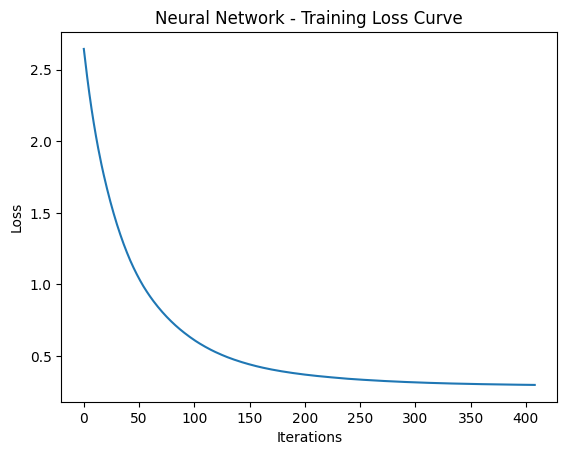

In [352]:
plt.plot(mlp_model.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Neural Network - Training Loss Curve")
plt.show()
